# CS485 - Data Science and Applications

  **Homework 1**

  Feel free to ignore the already implemented code and use your own.

## **Part A**

We will empirically verify that solving a linear system using np.linalg.solve() is more efficient than computing the inverse explicitly and multiplying it by the vector.
### Experiment Design

   1. Generate a random $n \times n$(for $n \in \{10, 50, 100, 200, 500, 1000\})$, a random matrix $A$ and a random vector $b$. Use your ID as a random seed.
   2. Solve for $x$ in $Ax = b$ using:
        - Direct inversion: $A^{-1} b$
        - np.linalg.solve(A, b)
   3. Repeat the experiment 10 times for each matrix size and compute the mean run time.
   4. Plot the results.

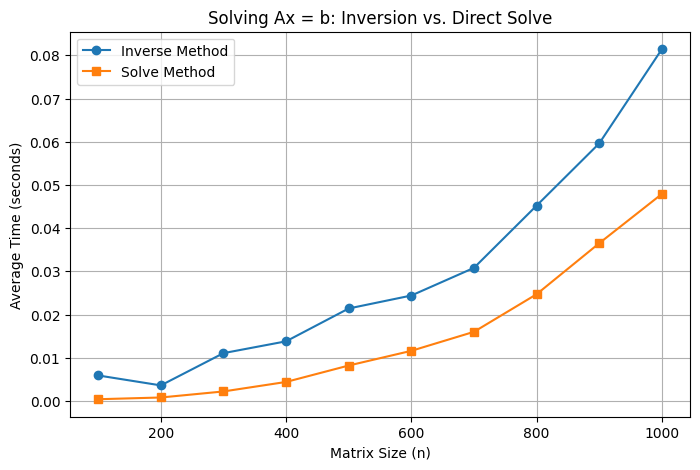

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Set random seed for reproducibility
np.random.seed(4676)

# Define range of matrix sizes and number of trials
n_values = list(range(100, 1001, 100))
num_trials = 10

# Store mean run times
times_inv = []
times_solve = []

for n in n_values:
    # Generate random matrix A and vector b
    A = np.random.rand(n, n)
    b = np.random.rand(n)
    
    inv_times = []
    solve_times = []
    
    for _ in range(num_trials):
        # Time the inversion method
        start = time.time()
        x_inv = np.linalg.inv(A) @ b
        inv_times.append(time.time() - start)
        
        # Time the direct solve method
        start = time.time()
        x_solve = np.linalg.solve(A, b)
        solve_times.append(time.time() - start)
    
    # Compute and store average times
    times_inv.append(np.mean(inv_times))
    times_solve.append(np.mean(solve_times))

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(n_values, times_inv, marker='o', linestyle='-', label='Inverse Method')
plt.plot(n_values, times_solve, marker='s', linestyle='-', label='Solve Method')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Average Time (seconds)')
plt.title('Solving Ax = b: Inversion vs. Direct Solve')
plt.legend()
plt.grid(True)
plt.show()

## Part B


 This exercise is crucial because it helps us understand the mechanics behind **data augmentation**—a key technique in enhancing machine learning models' robustness by generating varied training examples from existing data. Data augmentation, such as rotations, scaling, and flipping, is instrumental in teaching models to recognize patterns and objects under diverse conditions, thus improving their ability to generalize. This foundational understanding is essential for tackling more complex data science challenges, where such transformations are often automated and embedded within more advanced analytical tools and models.

In [26]:
!wget -O image.jpg 'https://everpresent.com/wp-content/uploads/2024/03/albert-einstein-sticks-out-his-tongue-when-asked-by-news-photo-1681316749-scaled.jpg'

'wget' is not recognized as an internal or external command,
operable program or batch file.


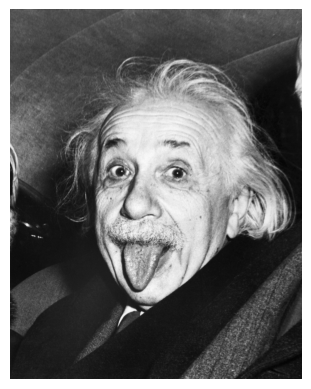

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Load the image file directly using matplotlib
img = plt.imread('image.jpg')

# Display the image
plt.imshow(img, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [28]:
img

array([[ 87,  90,  91, ..., 100,  94,  98],
       [ 88,  90,  89, ...,  99,  95, 100],
       [ 94,  93,  89, ..., 101,  98, 102],
       ...,
       [ 33,  33,  32, ...,  30,  30,  30],
       [ 33,  33,  33, ...,  31,  33,  33],
       [ 33,  33,  33, ...,  32,  33,  34]],
      shape=(2560, 2020), dtype=uint8)

### Question A

Flipping an image, such as reflecting it across a vertical or horizontal axis, is not strictly a linear transformation; it is an affine transformation. Here’s why:

### Linear vs. Affine Transformations
1. **Linear Transformations** strictly adhere to two main properties:
   - **Additivity**: $T(u + v) = T(u) + T(v)$
   - **Homogeneity**: $T(\alpha u) = \alpha T(u)$

   These transformations can be represented solely by a matrix multiplication and include rotations, scalings, and shearings. Linear transformations always map the origin to itself.

2. **Affine Transformations** include all linear transformations and also allow translations (shifts). They can be represented by a matrix multiplication followed by a vector addition:
   $$
   \text{For a vector } x, \quad T(x) = Ax + b
   $$
   Here, $A$ is a matrix that performs the linear part of the transformation, and $b$ is a vector that handles the translation.

### Flipping Images
When you flip an image, you effectively reflect its pixels across an axis. This operation can be visualized as follows:

- **Vertical Flip**: Mirrors the image over the horizontal axis. This can be thought of as a reflection combined with a translation if the image is considered to extend from $0$ to $n$ pixels vertically.
- **Horizontal Flip**: Mirrors the image over the vertical axis. Similarly, this is a reflection possibly combined with a translation in the horizontal direction.

The matrix for a flip (reflection) might look like this for a vertical flip in 2D space, where $y$ values are inverted:
$$
R_{vertical} = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
$$
This matrix inverts the $y$-coordinate while keeping the $x$-coordinate the same, which reflects points over the $x$-axis. To correctly place the reflected points relative to the original image coordinates, a translation vector might be necessary, depending on your coordinate system and image handling conventions (e.g., flipping the image to the bottom of the canvas if your origin is at the top).


In [36]:
def vertical_flip(img):
    return img[::-1, :]

In [39]:
def horizontal_flip(img):
    return img[:, ::-1]

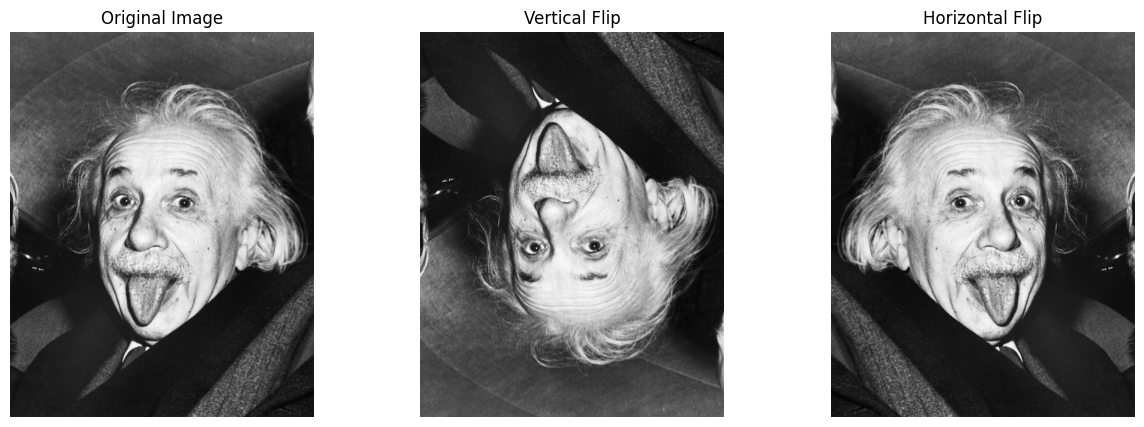

In [40]:
# Apply the vertical flip
vertical_flipped_image = vertical_flip(img)

# Apply the horizontal flip
horizontal_flipped_image = horizontal_flip(img)

# Plotting the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axes[0].imshow(img, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Vertically flipped image
axes[1].imshow(vertical_flipped_image, cmap='gray')
axes[1].set_title("Vertical Flip")
axes[1].axis('off')

# Horizontally flipped image
axes[2].imshow(horizontal_flipped_image, cmap='gray')
axes[2].set_title("Horizontal Flip")
axes[2].axis('off')

plt.show()


### Question B

Using a rotation matrix and Linear Transformations rotate and plot the image of Albert Einstein by 45 degrees. (Takes around 45-60 seconds per run)

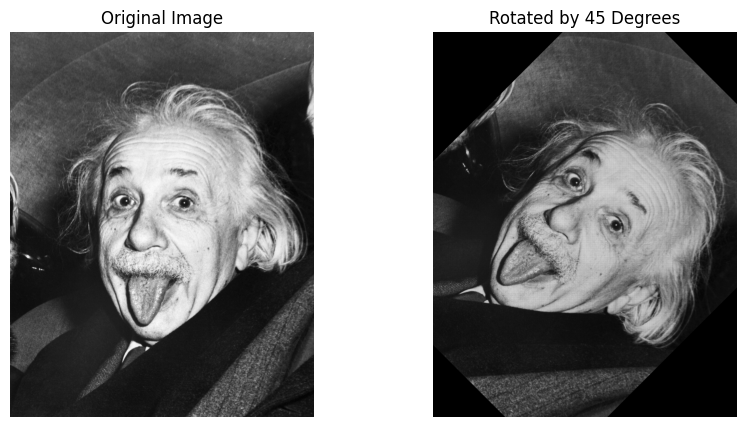

In [44]:
def rotate_image(image, angle):
    theta = np.radians(angle)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    rotation_matrix = np.array([[cos_theta, -sin_theta],
                                [sin_theta, cos_theta]])
    
    height, width = image.shape[:2]
    rotated = np.zeros_like(image)
    
    # Calculate center of the image
    cx = (width - 1) / 2.0
    cy = (height - 1) / 2.0
    
    for x in range(width):
        for y in range(height):
            # Translate to origin
            x_translated = x - cx
            y_translated = y - cy
            
            # Apply rotation
            x_rot = x_translated * cos_theta - y_translated * sin_theta
            y_rot = x_translated * sin_theta + y_translated * cos_theta
            
            # Translate back and round coordinates
            x_new = int(round(x_rot + cx))
            y_new = int(round(y_rot + cy))
            
            # Check bounds and assign pixel value
            if 0 <= x_new < width and 0 <= y_new < height:
                rotated[y_new, x_new] = image[y, x]
    
    return rotated

# Rotate the image by 45 degrees
rotated_img = rotate_image(img, 45)

# Display the original and rotated images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_img, cmap='gray')
plt.title('Rotated by 45 Degrees')
plt.axis('off')

plt.show()